## Analysing and Predicting Business Activity for Cafes and Restaurants in Melbourne

**Duration:** 90 minutes 
**Level:** Intermediate  
**Pre-requisite Skills:** Python 

## Scenario

Melbourne's vibrant cafe and restaurant scene is a key part of its cultural identity and economic landscape. As the city grows, business owners and urban planners alike face challenges in understanding the factors that influence the success and sustainability of these establishments. This use case explores the relationship between employment density, industry type, and the business activity of cafes and restaurants.

Using two datasets "Cafes and Restaurants with Seating Capacity" and "Employment by Block by Clue Industry", we will identify trends in business density, seating arrangements, and the impact of nearby employment activity. The aim is to provide insights for prospective business owners to make data-driven decisions on location and capacity planning while also informing city planners on how employment trends influence the hospitality sector.

Patterns will be uncovered, such as how specific employment sectors like finance or business services impact customer foot traffic and seating demand. While, areas with low employment density or irrelevant industries may show reduced viability for new establishments.

With these findings, stakeholders can strategically support the hospitality sector, ensuring Melbourne remains a hub for vibrant cafes and restaurants that cater to its dynamic workforce.

### Problem Description

As a prospective cafe or restaurant owner, I want to identify high-potential locations and seating capacity requirements, so that I can maximise customer satisfaction and business efficiency.

As an urban planner, I want to understand how employment patterns impact cafes and restaurants, so that I can develop policies that support vibrant and sustainable business districts.


### What this use case will teach you

At the end of this use case, you will be able to:
- Conduct exploratory data analysis (EDA) on geospatial business data.
- Identify correlations between employment density and business activity.
- Use predictive modeling to recommend optimal seating capacity and locations.
- Visualise trends and insights using effective color schemes and mapping techniques.

### Introduction

Melbourne’s hospitality industry thrives on a balance of customer demand, location advantages, and operational efficiencies. Understanding where to open a cafe or restaurant, how to optimise seating, and which areas have untapped potential can be challenging. Employment density varies significantly across Melbourne’s Central Business District (CBD), creating opportunities and challenges for the industry.

Using the City of Melbourne’s CLUE datasets, this use case addresses these questions by analysing existing business distribution and employment trends. The “Cafes and Restaurants with Seating Capacity” dataset provides details on business types, seating configurations, and locations, while the “Employment by Block by Clue Industry” dataset adds insights into economic activity and potential customer bases. Together, these datasets enable business owners and policymakers to make informed, data-driven decisions.


In [119]:
import pandas as pd
import os
import requests
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.cluster import KMeans

## Importing Datasets

Import datasets using API which containing information about cafes, restaurants, and employment statistics in Melbourne to prepare them for analysis and modeling.

In [120]:
def API_Unlimited(datasetname): # pass in dataset name and api key
    dataset_id = datasetname

    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    #apikey = api_key
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC'
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        datasetname = pd.read_csv(StringIO(url_content), delimiter=';')
        print(datasetname.sample(10, random_state=999)) # Test
        return datasetname 
    else:
        return (print(f'Request failed with status code {response.status_code}'))
        

In [121]:
download_link_1 = 'cafes-and-restaurants-with-seating-capacity'
download_link_2 = 'employment-by-block-by-clue-industry'

# Use functions to download and load data
cafes_df = API_Unlimited(download_link_1)
employment_df = API_Unlimited(download_link_2)

       census_year  block_id  property_id  base_property_id  \
33589         2021        21       579252            579252   
53701         2015        58       105656            105656   
12141         2012       920       104437            104437   
1603          2018        65       105875            105875   
13239         2013      1110       620312            593737   
12506         2013        48       101109            101109   
49854         2021        72       105375            105375   
45230         2005        45       101142            101142   
47447         2020        55       109285            109285   
9747          2021       263       101243            101243   

                                  building_address  clue_small_area  \
33589    559-587 Collins Street MELBOURNE VIC 3000  Melbourne (CBD)   
53701        11-19 Liverpool Street MELBOURNE 3000  Melbourne (CBD)   
12141        300-328 Grattan Street PARKVILLE 3050        Parkville   
1603   318-322 Little 

## Data Preparation and Loading

In this section, we load the cafes and restaurants dataset and the employment by block dataset into pandas DataFrames. By displaying the first few rows of each dataset, we can gain an initial understanding of their structure, key columns, and data content.

In [122]:
# Display the first five rows of both datasets to understand their structure, column names, and initial data
print("Cafes and restaurants dataset")
print(cafes_df.head())

print("\nEmployment by block dataset")
print(employment_df.head())

Cafes and restaurants dataset
   census_year  block_id  property_id  base_property_id  \
0         2017         6       578324            573333   
1         2017         6       578324            573333   
2         2017        11       103957            103957   
3         2017        11       103957            103957   
4         2017        11       103985            103985   

                         building_address  clue_small_area  \
0        2 Swanston Street MELBOURNE 3000  Melbourne (CBD)   
1        2 Swanston Street MELBOURNE 3000  Melbourne (CBD)   
2    517-537 Flinders Lane MELBOURNE 3000  Melbourne (CBD)   
3    517-537 Flinders Lane MELBOURNE 3000  Melbourne (CBD)   
4  562-564 Flinders Street MELBOURNE 3000  Melbourne (CBD)   

            trading_name                                   business_address  \
0        Transport Hotel  Tenancy 29, Ground , 2 Swanston Street MELBOUR...   
1        Transport Hotel  Tenancy 29, Ground , 2 Swanston Street MELBOUR...   
2  Al

## Datasets Structure and Statistics

This section provides an overview of the cafes and restaurants dataset and the employment by block dataset. It includes details about data types, non-null counts, and descriptive statistics such as mean, standard deviation, and percentiles. Additionally, it identifies missing values in both datasets, which is crucial for understanding data quality and preparing for analysis.

In [123]:
# Display column details, data types, and missing value counts for the cafes dataset
print("Cafes and Restaurants Dataset Info:")
print(cafes_df.info())

# Show summary statistics (e.g., mean, min, max) for numerical columns in the cafes dataset
print("\nCafes and Restaurants Dataset Summary Statistics:")
print(cafes_df.describe())

# Display column details, data types, and missing value counts for the employment dataset
print("\nEmployment by Block Dataset Info:")
print(employment_df.info())

# Show summary statistics for numerical columns in the employment dataset
print("\nEmployment by Block Dataset Summary Statistics:")
print(employment_df.describe())

# Check for missing values in each column of the cafes dataset
print("\nMissing values in Cafes and Restaurants Dataset:")
print(cafes_df.isnull().sum())

# Check for missing values in each column of the employment dataset
print("\nMissing values in Employment by Block Dataset:")
print(employment_df.isnull().sum())


Cafes and Restaurants Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60055 entries, 0 to 60054
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   census_year                   60055 non-null  int64  
 1   block_id                      60055 non-null  int64  
 2   property_id                   60055 non-null  int64  
 3   base_property_id              60055 non-null  int64  
 4   building_address              60055 non-null  object 
 5   clue_small_area               60055 non-null  object 
 6   trading_name                  60055 non-null  object 
 7   business_address              60055 non-null  object 
 8   industry_anzsic4_code         60055 non-null  int64  
 9   industry_anzsic4_description  60055 non-null  object 
 10  seating_type                  60055 non-null  object 
 11  number_of_seats               60055 non-null  int64  
 12  longitude               

### Data Cleaning and Data Fiiltering

In [124]:
# Fill missing values in the employment dataset with 0s
employment_df = employment_df.fillna(0)

# Ensure both datasets have matching data types to merge columns
cafes_df['block_id'] = cafes_df['block_id'].astype(int)
employment_df['block_id'] = employment_df['block_id'].astype(int)

# Keep 'clue_small_area' as strings (retain original labels for interpretability)
cafes_df['clue_small_area'] = cafes_df['clue_small_area'].astype(str)
employment_df['clue_small_area'] = employment_df['clue_small_area'].astype(str)

# Filter employment dataset for Census years up to 2017
employment_df_filtered = employment_df[employment_df['census_year'] <= 2017]


In [125]:
# Display the first row of the employment dataset
print("\nFirst row of Employment Dataset:")
print(employment_df_filtered.iloc[0])

# Display the first row of the cafes dataset
print("\nFirst row of Cafes and Restaurants Dataset:")
print(cafes_df.iloc[0])



First row of Employment Dataset:
census_year                                            2017
block_id                                                  1
clue_small_area                             Melbourne (CBD)
accommodation                                           0.0
admin_and_support_services                             94.0
agriculture_and_mining                                  0.0
arts_and_recreation_services                            0.0
business_services                                       0.0
construction                                            0.0
education_and_training                                  0.0
electricity_gas_water_and_waste_services                0.0
finance_and_insurance                                   0.0
food_and_beverage_services                             66.0
health_care_and_social_assistance                       0.0
information_media_and_telecommunications                0.0
manufacturing                                           0.0
other_

### Merge datasets

In [126]:
print(cafes_df['clue_small_area'].dtype)
print(employment_df['clue_small_area'].dtype)

object
object


In [127]:
# Merge the datasets based on matching columns
merged_df = pd.merge(
    cafes_df,
    employment_df_filtered,
    on=['census_year', 'block_id', 'clue_small_area'],
    how='inner'
)

# Check and remove duplicates
merged_df = merged_df.drop_duplicates()

# Check structure
print("Columns in the Merged Dataset:")
print(merged_df.columns.tolist())

print("\nFirst row of the Merged Dataset:")
print(merged_df.iloc[0])


Columns in the Merged Dataset:
['census_year', 'block_id', 'property_id', 'base_property_id', 'building_address', 'clue_small_area', 'trading_name', 'business_address', 'industry_anzsic4_code', 'industry_anzsic4_description', 'seating_type', 'number_of_seats', 'longitude', 'latitude', 'location', 'accommodation', 'admin_and_support_services', 'agriculture_and_mining', 'arts_and_recreation_services', 'business_services', 'construction', 'education_and_training', 'electricity_gas_water_and_waste_services', 'finance_and_insurance', 'food_and_beverage_services', 'health_care_and_social_assistance', 'information_media_and_telecommunications', 'manufacturing', 'other_services', 'public_administration_and_safety', 'real_estate_services', 'rental_and_hiring_services', 'retail_trade', 'transport_postal_and_storage', 'wholesale_trade', 'total_jobs_in_block']

First row of the Merged Dataset:
census_year                                                                              2017
block_id   

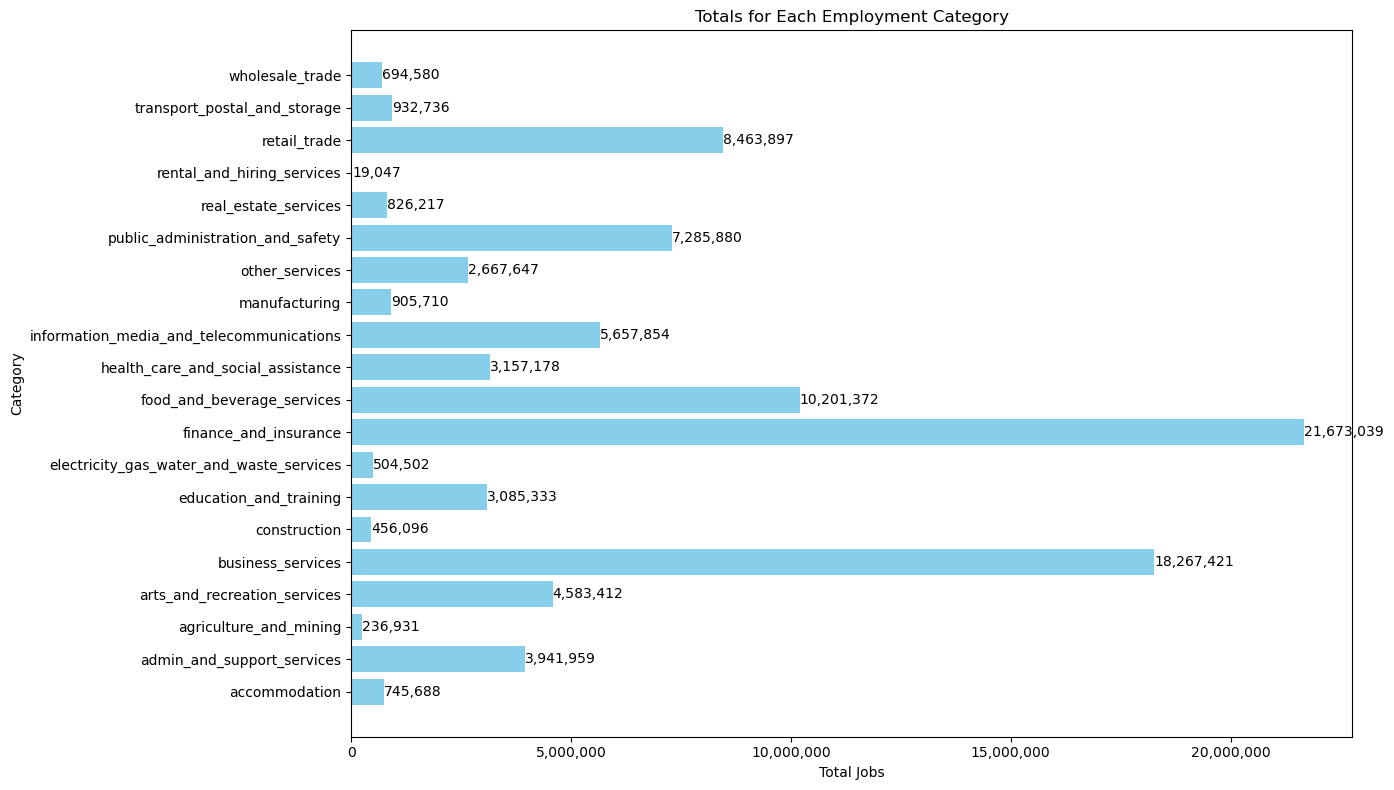

In [128]:
# Calculate the sum totals for each category
category_totals = merged_df[['accommodation', 'admin_and_support_services', 'agriculture_and_mining', 
                             'arts_and_recreation_services', 'business_services', 'construction', 
                             'education_and_training', 'electricity_gas_water_and_waste_services', 
                             'finance_and_insurance', 'food_and_beverage_services', 
                             'health_care_and_social_assistance', 'information_media_and_telecommunications', 
                             'manufacturing', 'other_services', 'public_administration_and_safety', 
                             'real_estate_services', 'rental_and_hiring_services', 'retail_trade', 
                             'transport_postal_and_storage', 'wholesale_trade']].sum()

# Convert to a DataFrame for easier visualisation
category_totals_df = category_totals.reset_index()
category_totals_df.columns = ['Category', 'Total']

# Ensure the totals are treated as numeric (float)
category_totals_df['Total'] = category_totals_df['Total'].astype(float)

# Create a bar plot
plt.figure(figsize=(14, 8))
bars = plt.barh(category_totals_df['Category'], category_totals_df['Total'], color='skyblue')
plt.title('Totals for Each Employment Category')
plt.xlabel('Total Jobs')
plt.ylabel('Category')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))  # Format x-axis as integers with commas

# Annotate totals below the bar chart
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,  # Position the text
             f'{int(bar.get_width()):,}',                      # Format as an integer with commas
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()


The graph above highlights Melbourne's diverse economic landscape, with significant job totals in Finance and Insurance (21.7M), Business Services (18.3M), and Food and Beverage Services (10.2M), reflecting high customer foot traffic potential for cafes and restaurants in these areas. Sectors like Retail Trade (8.5M) and Arts and Recreation Services (4.6M) also show strong opportunities, catering to shoppers and leisure seekers. However, smaller sectors like Rental and Hiring Services (19K) and Agriculture and Mining (237K) indicate limited viability for new establishments. High-density employment categories present the best growth opportunities, especially in hospitality, financial, and business hubs.

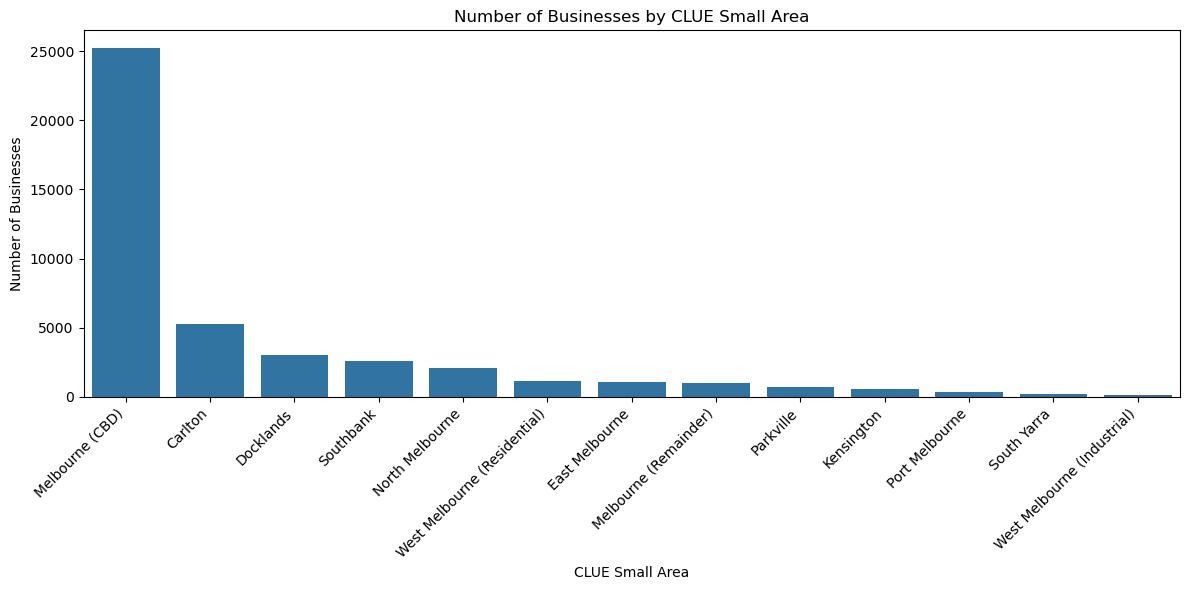

In [129]:
# Barplot for business density by CLUE small area
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='clue_small_area', order=merged_df['clue_small_area'].value_counts().index)
plt.title('Number of Businesses by CLUE Small Area')
plt.xticks(rotation=45, ha='right')
plt.xlabel('CLUE Small Area')
plt.ylabel('Number of Businesses')
plt.tight_layout()
plt.show()


The bar plot shows the number of businesses in each CLUE small area of Melbourne, highlighting areas with high or low business density. High-density areas (e.g., Melbourne CBD) are hubs of economic activity and customer foot traffic, making them ideal for new cafes or restaurants. Low-density areas may represent untapped opportunities for growth or less commercially active zones. This insight supports location planning and infrastructure decisions for business owners and urban planners.

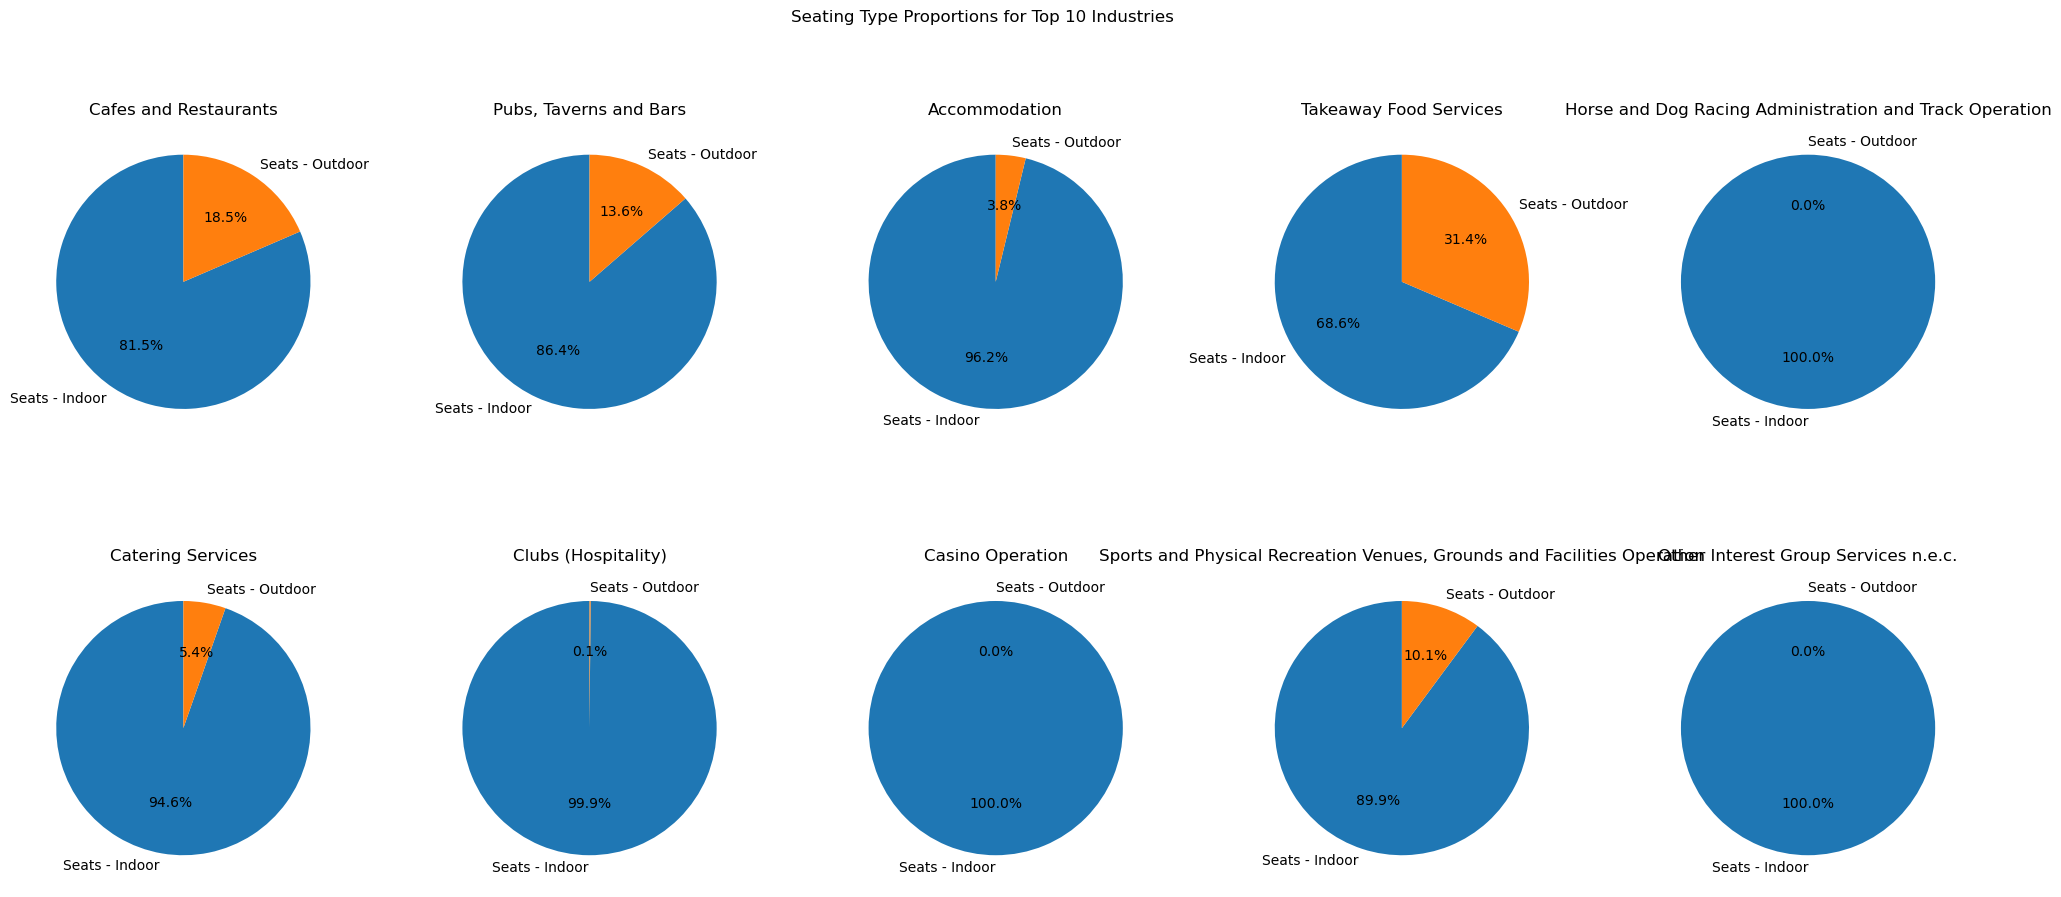

In [130]:
# Multiple pie charts
fig, axes = plt.subplots(2, 5, figsize=(20, 10), subplot_kw=dict(aspect="equal"))
axes = axes.flatten()

# Define colours for seating types
colors = {'Seats - Indoor': '#1f77b4', 'Seats - Outdoor': '#ff7f0e'}

for i, industry in enumerate(top_10_industries):
    # Filter data for the industry
    industry_data = top_10_data[top_10_data['industry_anzsic4_description'] == industry]
    
    # Group and ensure all seating types are represented
    seating_counts = industry_data.groupby('seating_type')['number_of_seats'].sum()
    seating_counts = seating_counts.reindex(['Seats - Indoor', 'Seats - Outdoor'], fill_value=0)

    # Create pie chart
    axes[i].pie(
        seating_counts,
        labels=seating_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=[colors[label] for label in seating_counts.index]
    )
    axes[i].set_title(industry)

# Add titles and adjust layout
plt.suptitle('Seating Type Proportions for Top 10 Industries')
plt.tight_layout()
plt.show()


The pie charts above show the distribution of seating types - indoor vs outdoor, across the top 10 industries. Most industries, such as "Pubs, Taverns and Bars" and "Catering Services," mainly feature indoor seating, emphasising indoor-focused service delivery in Melbourne's hospitality sector. Meanwhile, "Takeaway Food Services" has a higher proportion of outdoor seating, reflecting a more casual, open-air dining approach suited for takeaway operations. Industries like "Casino Operation" and "Clubs (Hospitality)" rely almost exclusively on indoor seating. This distribution highlights how seating arrangements align with the operational and customer engagement models of different industries.